# Lazy analysis of scRNA-seq

We all know that preprocessing for single-cell analysis is tedious and boring. In future OmicVerse development, we will gradually introduce agents to make the entire analysis fully automated. In version 1.7.0, we already support fully automated data preprocessing, and in the next release we expect to automate cell annotation.

* We provide a function `omicverse.single.lazy`, which can preprocess single-cell data automatically, with adjustable parameters.
* We offer an analysis-report generator `omicverse.single.generate_scRNA_report`, similar to MultiQC, to visualize our preprocessing results.
* Moreover, **for every analysis** invoked within OmicVerse, you can now generate reference citations and DOIs via `ov.generate_reference_table`.


In [1]:
import scanpy as sc
#import pertpy as pt
import omicverse as ov
ov.plot_set()

🔬 Starting plot initialization...
🧬 Detecting CUDA devices…
✅ [GPU 0] NVIDIA H100 80GB HBM3
    • Total memory: 79.1 GB
    • Compute capability: 9.0

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.0   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.



## Data Preparation

The data we use in the following example comes from Haber et al., 2017. It contains samples from the small intestinal epithelium of mice with different conditions. We first load the raw cell-level data. The dataset contains gene expressions of 9842 cells. They are annotated with their sample identifier (batch), the condition of the subjects and the type of each cell (cell_label).

In [ ]:
import pertpy as pt
adata = pt.dt.haber_2017_regions()
adata

In [4]:
ov.settings.cpu_gpu_mixed_init()

CPU-GPU mixed mode activated


## Lazy analysis

Currently, only human and mouse species are supported; we may add more species in the future. If you don’t specify any parameters, the analysis will run using the default settings.


CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 4.53 μs
🔧 The mode of lazy is cpu-gpu-mixed
✅ All packages used in lazy are installed
❌ QC step didn't start, we will start it now
🔧 The argument of qc we set
   mito_perc: 0.2
   nUMIs: 500
   detected_genes: 250
   doublets_method: scrublet
   batch_key: batch

⚙️ Using torch CPU/GPU mixed mode...
📊 [GPU 0] ------------------------------ 4/81559 MiB (0.0%)
Calculate QC metrics
End calculation of QC metrics.
Original cell number: 9842
!!!It should be noted that the `scrublet` detection is too old and             may not work properly.!!!
!!!if you want to use novel doublet detection,             please set `doublets_method=sccomposite`!!!
Begin of post doublets removal and QC plot using`scrublet`
Running Scrublet🔍
filtered out 3076 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (

2025-05-27 02:50:31,149 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-05-27 02:50:35,626 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-05-27 02:50:35,740 - harmonypy - INFO - Iteration 1 of 10
2025-05-27 02:50:40,198 - harmonypy - INFO - Iteration 2 of 10
2025-05-27 02:50:42,596 - harmonypy - INFO - Iteration 3 of 10
2025-05-27 02:50:43,724 - harmonypy - INFO - Iteration 4 of 10
2025-05-27 02:50:44,843 - harmonypy - INFO - Iteration 5 of 10
2025-05-27 02:50:45,594 - harmonypy - INFO - Iteration 6 of 10
2025-05-27 02:50:46,093 - harmonypy - INFO - Iteration 7 of 10
2025-05-27 02:50:46,490 - harmonypy - INFO - Iteration 8 of 10
2025-05-27 02:50:46,934 - harmonypy - INFO - Iteration 9 of 10
2025-05-27 02:50:47,438 - harmonypy - INFO - Iteration 10 of 10
2025-05-27 02:50:47,844 - harmonypy - INFO - Stopped before convergence


🖥️ Using Scanpy CPU to calculate neighbors...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:25)
🔍 [2025-05-27 02:51:13] Running UMAP in 'cpu-gpu-mixed' mode...
🚀 Using torch GPU to calculate UMAP...
📊 [GPU 0] ------------------------------ 4/81559 MiB (0.0%)
computing UMAP🚀
    finished ✅: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:09)
✅ UMAP completed successfully.
⚙️ Using torch CPU/GPU mixed mode to calculate t-SNE...
📊 [GPU 0] ------------------------------ 1084/81559 MiB (1.3%)
computing tSNE🔍
    using sklearn.manifold.TSNE
    finished ✅: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:15)
❌ Batch Correction: `scVI` step didn't start, we will start it now
...Begin using scVI to correct batch effect


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA H100 80GB HBM3') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


🖥️ Using Scanpy CPU to calculate neighbors...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
🔍 [2025-05-27 02:54:44] Running UMAP in 'cpu-gpu-mixed' mode...
🚀 Using torch GPU to calculate UMAP...
📊 [GPU 0] ------------------------------ 1158/81559 MiB (1.4%)
computing UMAP🚀
    finished ✅: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:03)
✅ UMAP completed successfully.
⚙️ Using torch CPU/GPU mixed mode to calculate t-SNE...
📊 [GPU 0] ------------------------------ 1234/81559 MiB (1.5%)
computing tSNE🔍
    using sklearn.manifold.TSNE
    finished ✅: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:24)
❌ Best Bench Correction Eval step didn't start, we will start it now
The Best Bench Correction Method is X_scVI
We can found it in `adata.uns['bench_

Processing items:   0%|          | 0/10 [00:00<?, ?it/s]

Mean CV accuracy: 0.8337
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8068


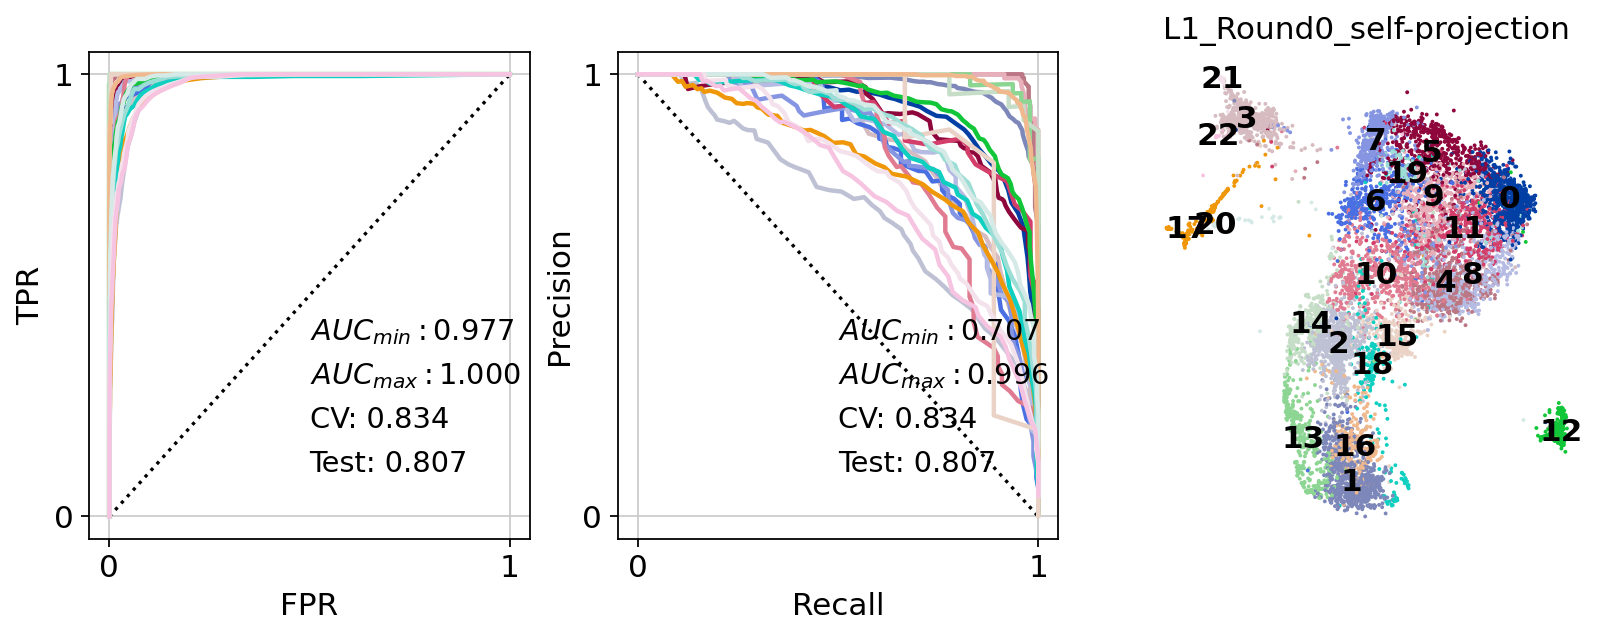

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8142


Processing item 0:  10%|█         | 1/10 [00:18<02:48, 18.69s/it, start_iter=0, R1norm_cutoff=0.296, R2norm_cutoff=0.00908, Accuracy=0.803, m1=0.306, m2=0.0101]

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8030
Converge SCCAF_optimize no. cluster!
Mean CV accuracy: 0.8278
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8180


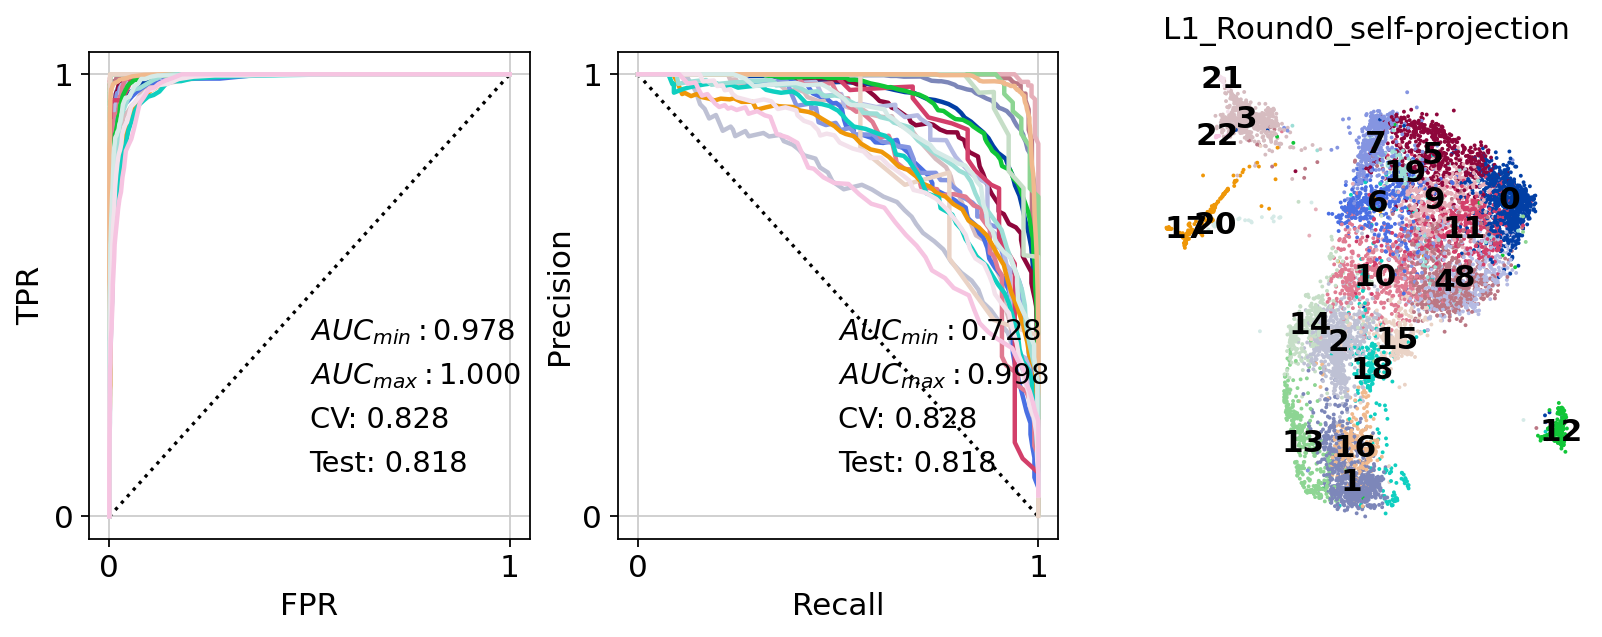

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.7950
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8111


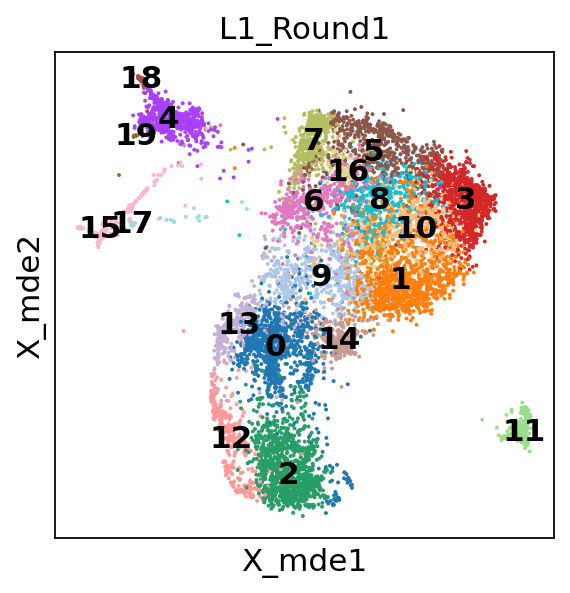

Mean CV accuracy: 0.8311
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8231


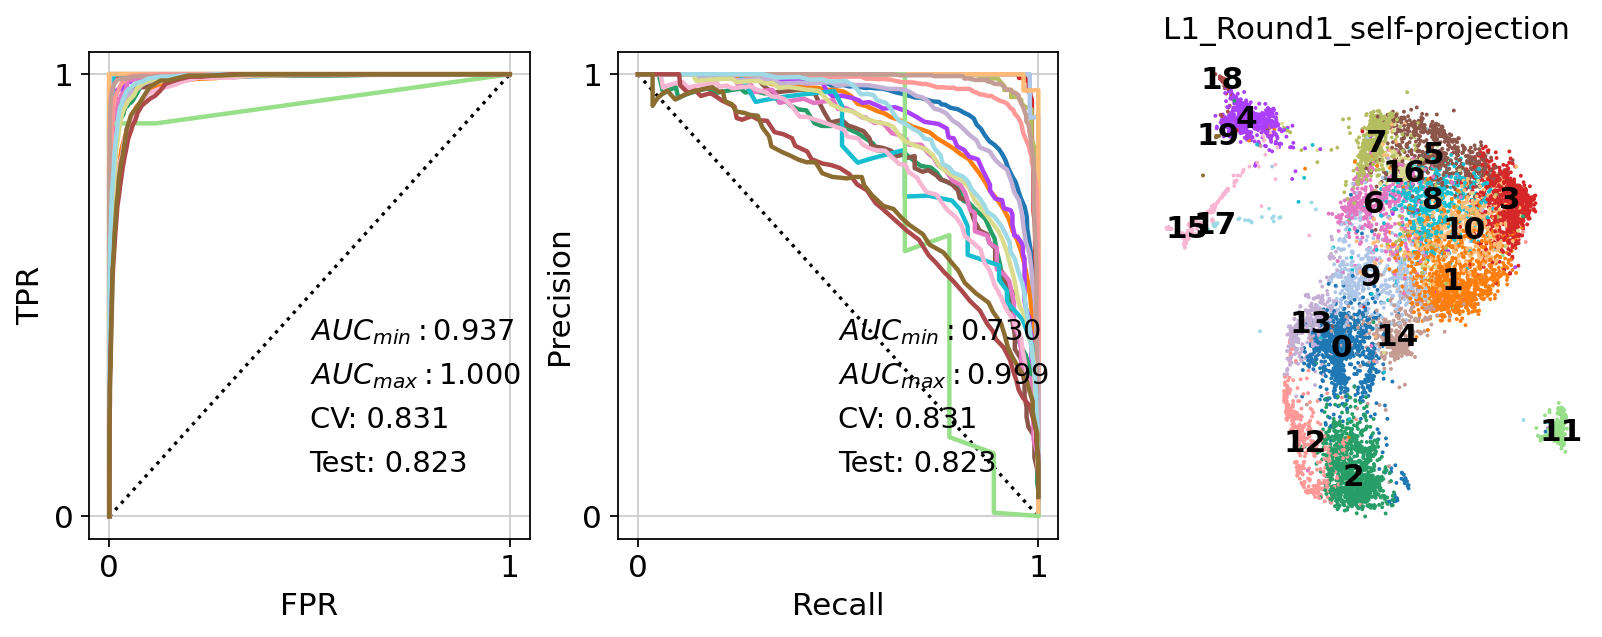

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8131


Processing item 1:  20%|██        | 2/10 [00:22<01:19,  9.97s/it, start_iter=1, R1norm_cutoff=0.189, R2norm_cutoff=0.00727, Accuracy=0.813, m1=0.199, m2=0.00827]

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8279
Converge SCCAF_optimize no. cluster!
Mean CV accuracy: 0.8231
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8234


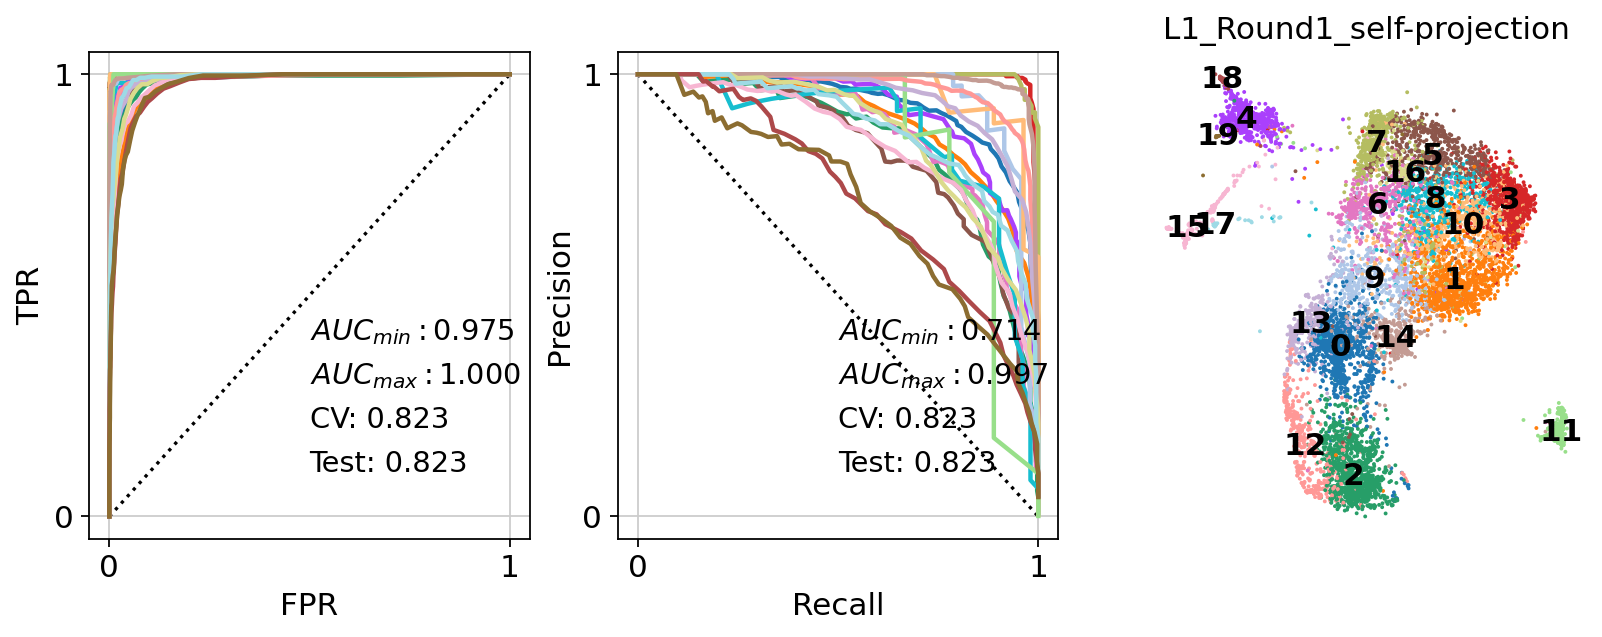

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8235
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8199


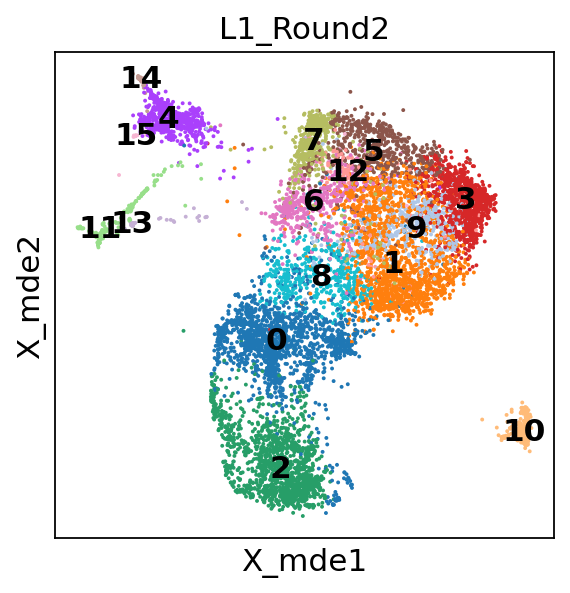

Mean CV accuracy: 0.8442
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8340


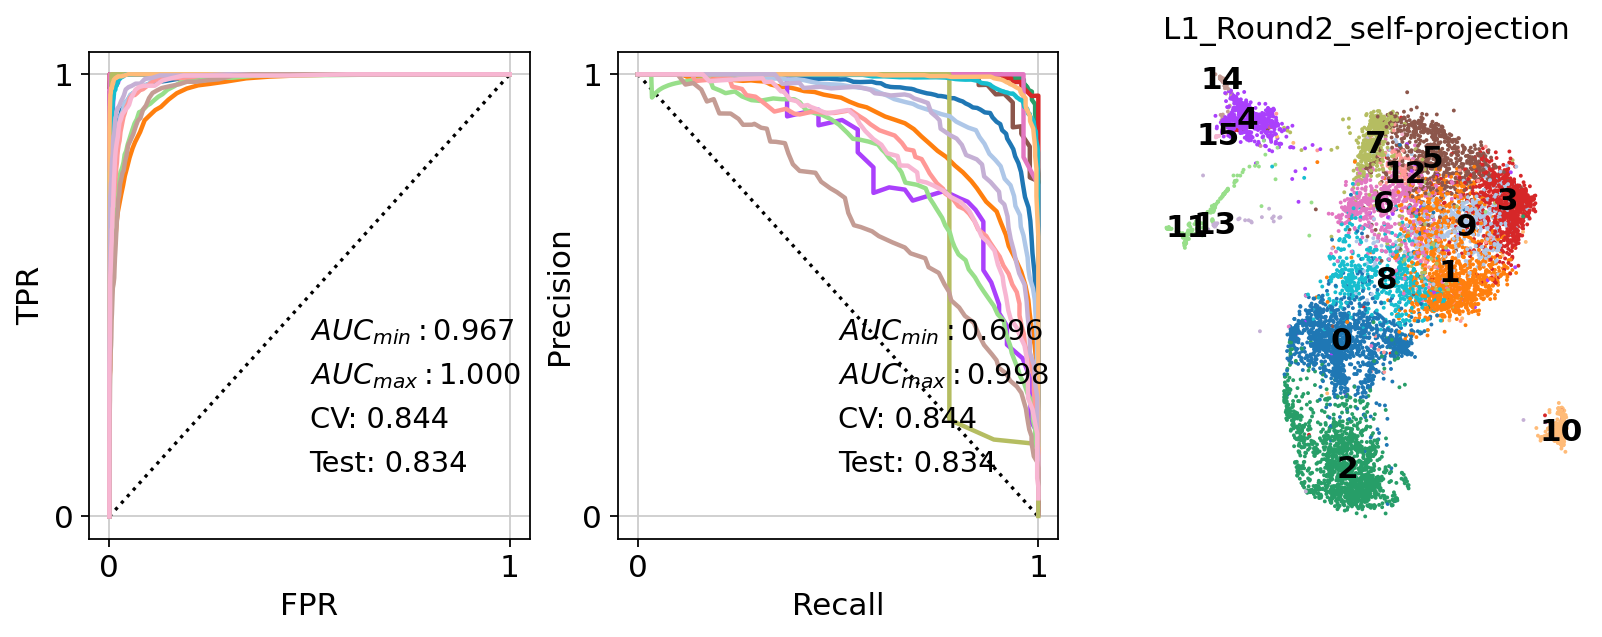

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8334
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8330


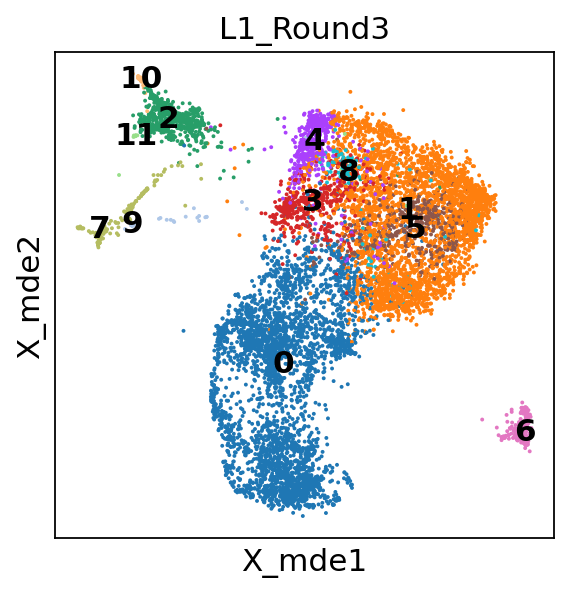

Mean CV accuracy: 0.8845
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8582


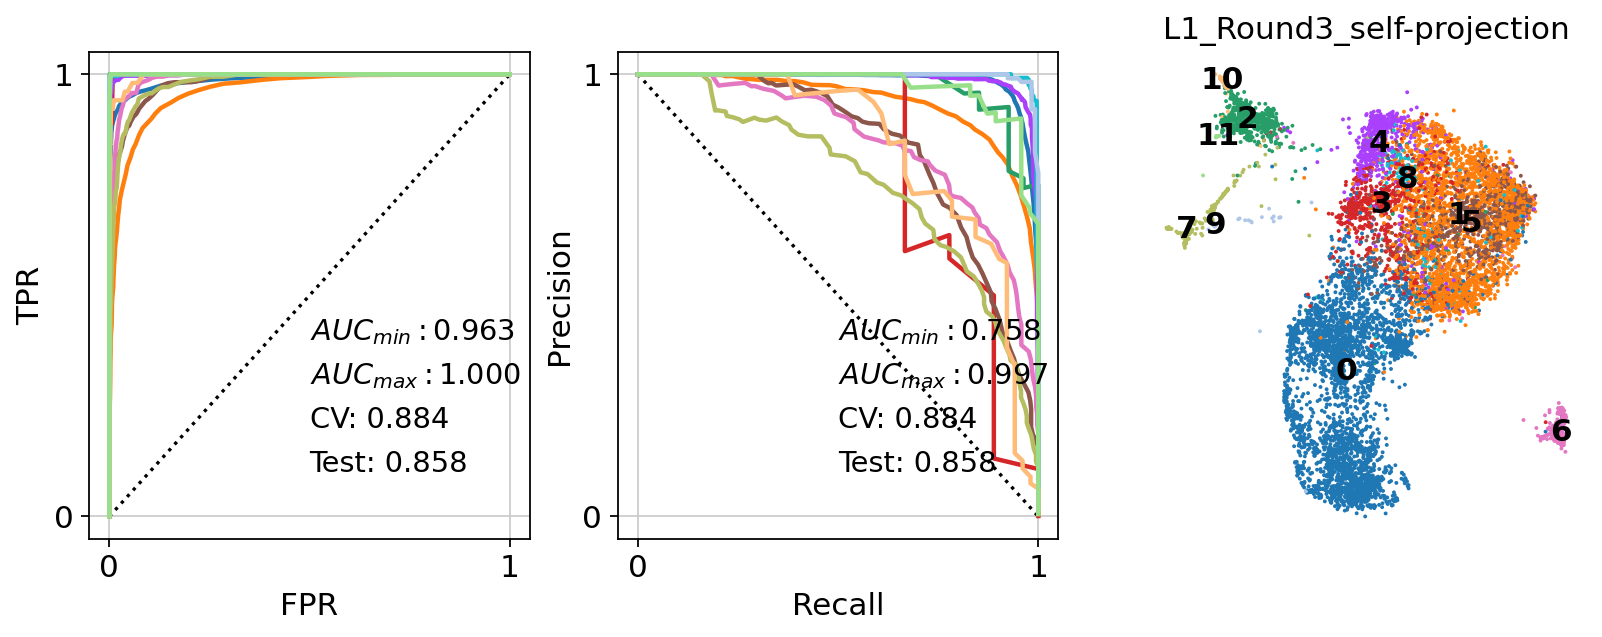

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8548
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8625


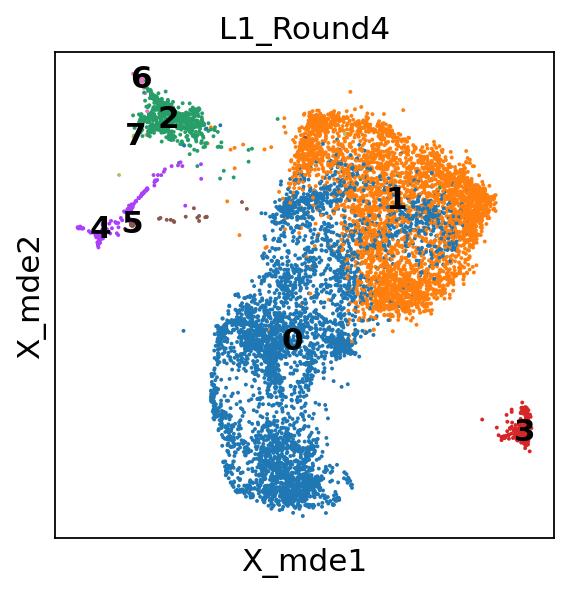

Mean CV accuracy: 0.9144
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8748


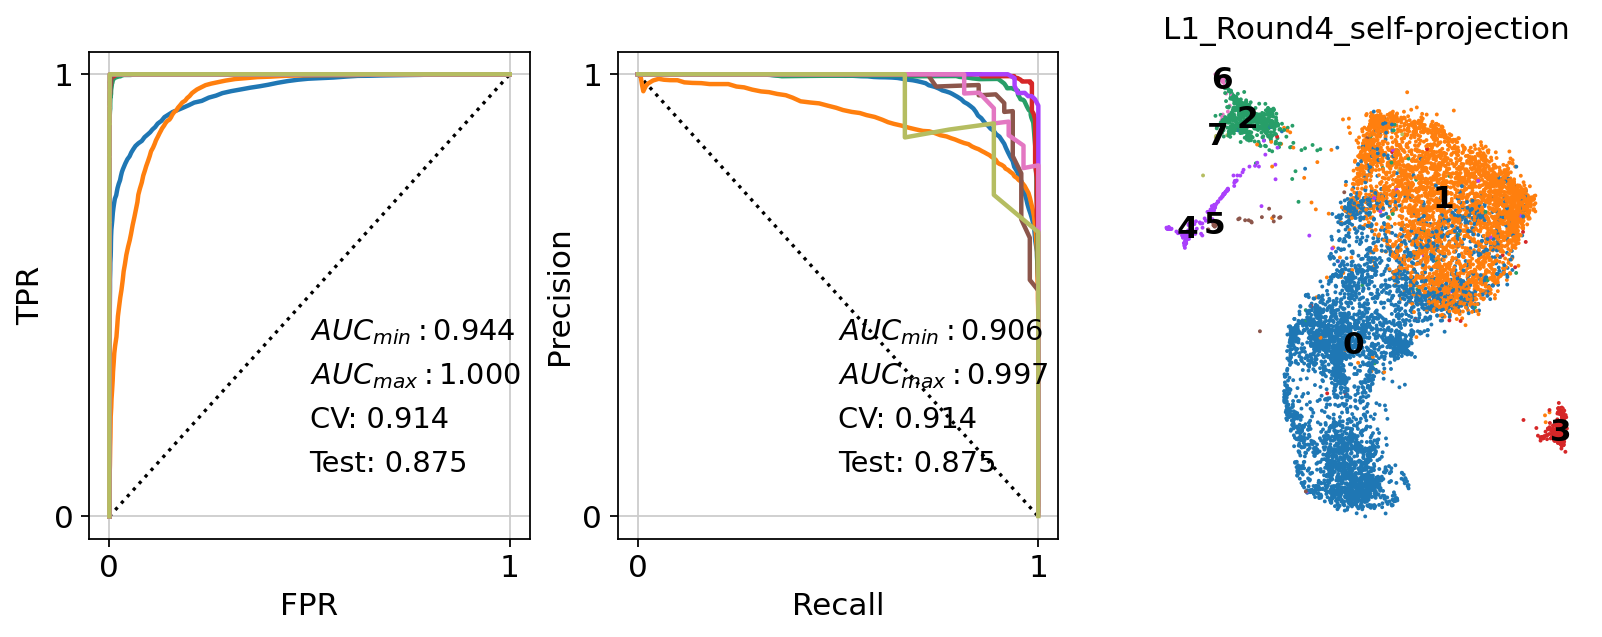

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8778
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.8907


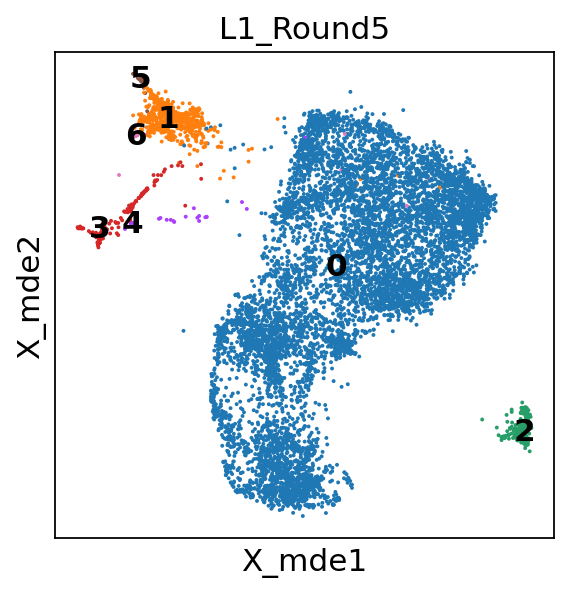

Mean CV accuracy: 0.9710
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9797


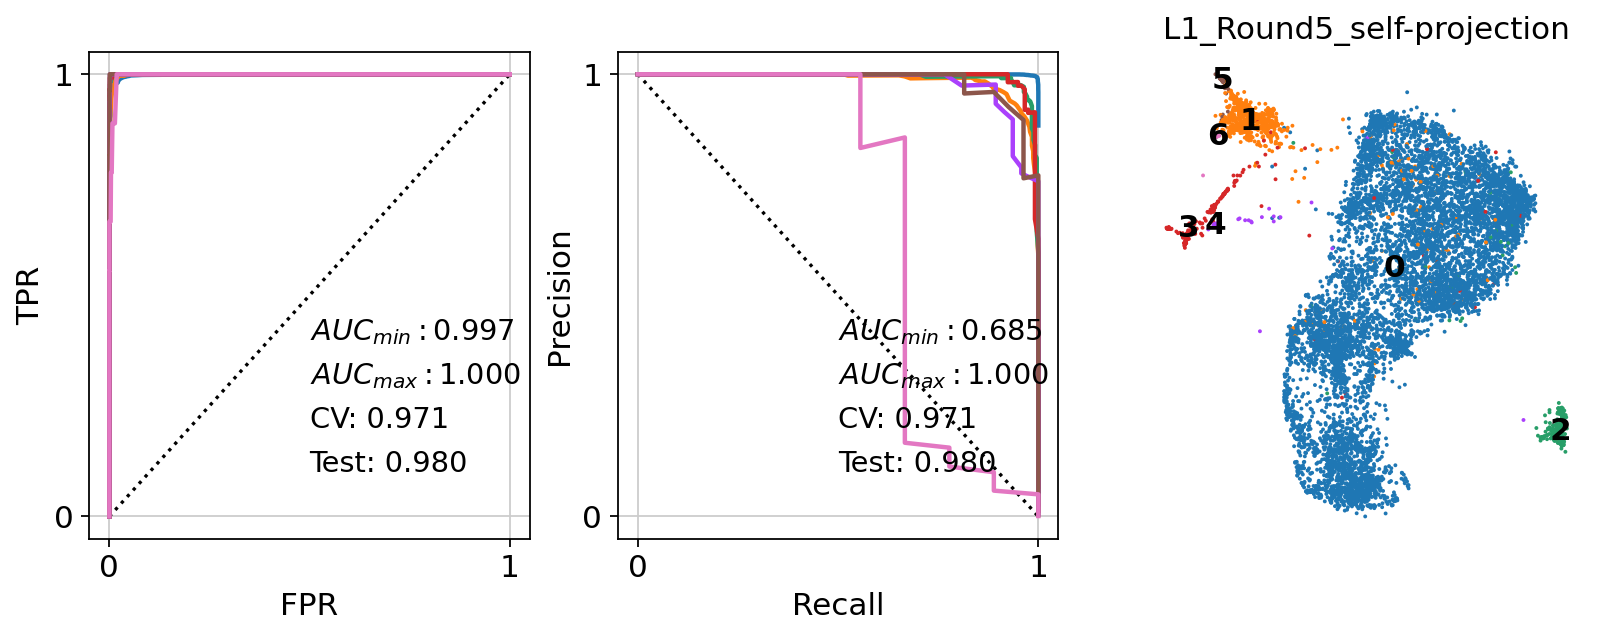

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9875
Accuracy on the training set: 1.0000


Processing item 1:  20%|██        | 2/10 [00:29<01:59, 14.97s/it, start_iter=1, R1norm_cutoff=0.189, R2norm_cutoff=0.00727, Accuracy=0.813, m1=0.199, m2=0.00827]

Accuracy on the hold-out set: 0.9726
Reached the minimum accuracy!
Smoothing the effect of clustering, Times: 0
running Leiden clustering


    finished: found 14 clusters and added
    'leiden_clusters_L1', the cluster labels (adata.obs, categorical) (0:00:04)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'louvain_clusters_L1', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden_clusters_L2', the cluster labels (adata.obs, categorical) (0:00:02)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 8 clusters and added
    'louvain_clusters_L2', the cluster labels (adata.obs, categorical) (0:00:00)
✅ UMAP step already finished, skipping it
✅ tSNE step already finished, skipping it


In [5]:
%time
adata=ov.single.lazy(adata,species='mouse',sample_key='batch')

Of course, you can also manually specify parameters. Here are some examples.


In [ ]:
adata=ov.single.lazy(
    adata,
    species='mouse',
    reforce_steps=['qc','preprocess','scaled','pca',
                'cell_cycle','Harmony','scVI',
                'eval_bench','umap','tsne'],
    sample_key='batch',
    qc_kwargs={
      'tresh': {'mito_perc': 0.2, 'nUMIs': 500, 'detected_genes': 250},
      'doublets_method': 'scrublet',
      'batch_key': 'batch'
    },
    preprocess_kwargs={
        'mode': 'shiftlog|pearson',
        'n_HVGs': 2000,
        'target_sum': 50*1e4
    },
    pca_kwargs={
        'layer':'scaled',
        'n_pcs':50,
        'use_highly_variable': True,
    },
    harmony_kwargs={
        'n_pcs':50,
    },
    scvi_kwargs={
        'n_layers':2, 
        'n_latent':30, 
        'gene_likelihood':"nb"
    },
)

🔬 Starting plot initialization...
🧬 Detecting CUDA devices…
✅ [GPU 0] NVIDIA H100 80GB HBM3
    • Total memory: 79.1 GB
    • Compute capability: 9.0
✅ plot_set complete.



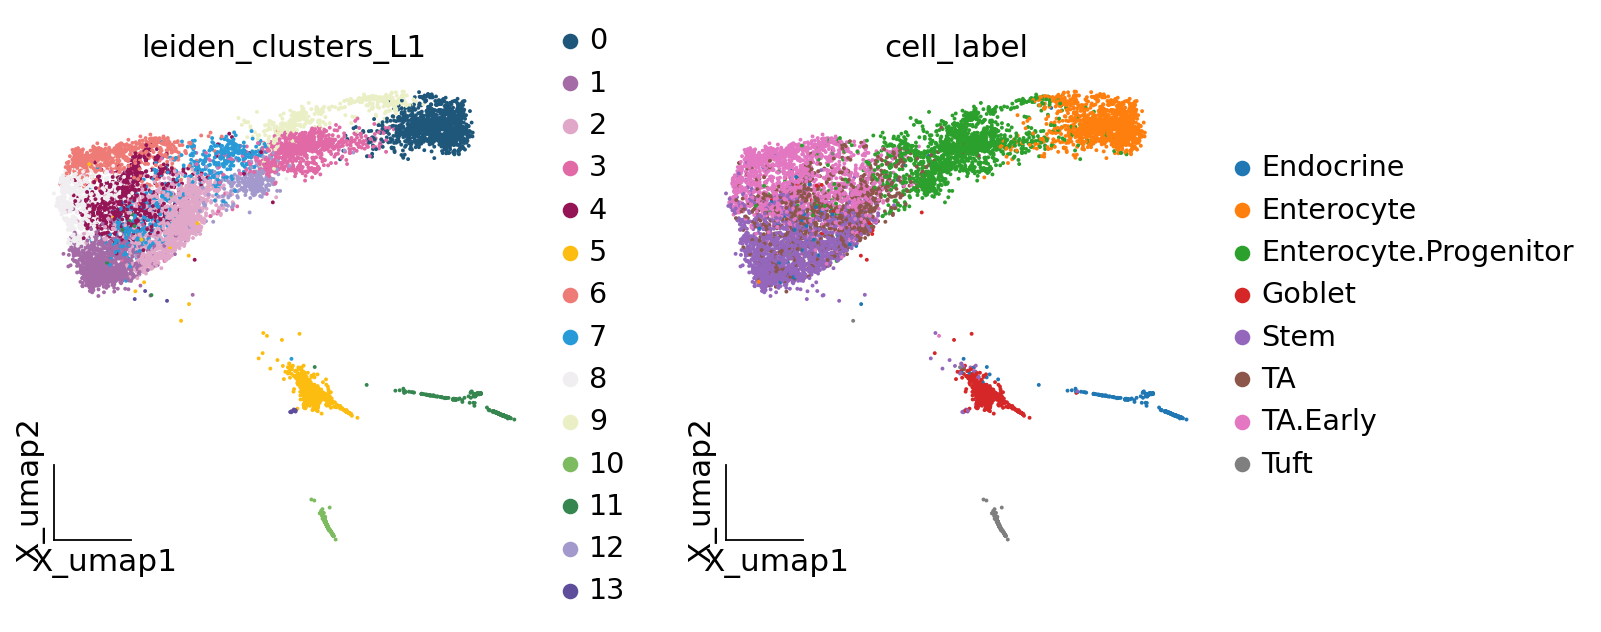

In [7]:
ov.plot_set()
ov.pl.embedding(
    adata,
    basis='X_umap',
    color=['leiden_clusters_L1','cell_label']
)

## Report Generation

If you’d like to obtain the analysis report from the `lazy` function, it’s just as simple: run

```bash
omicverse.single.generate_scRNA_report
```

using the same parameters you passed to `lazy`. We’ll continue to refine the report’s layout in future releases, and we welcome your suggestions via GitHub Issues: [https://github.com/Starlitnightly/omicverse/issues](https://github.com/Starlitnightly/omicverse/issues)


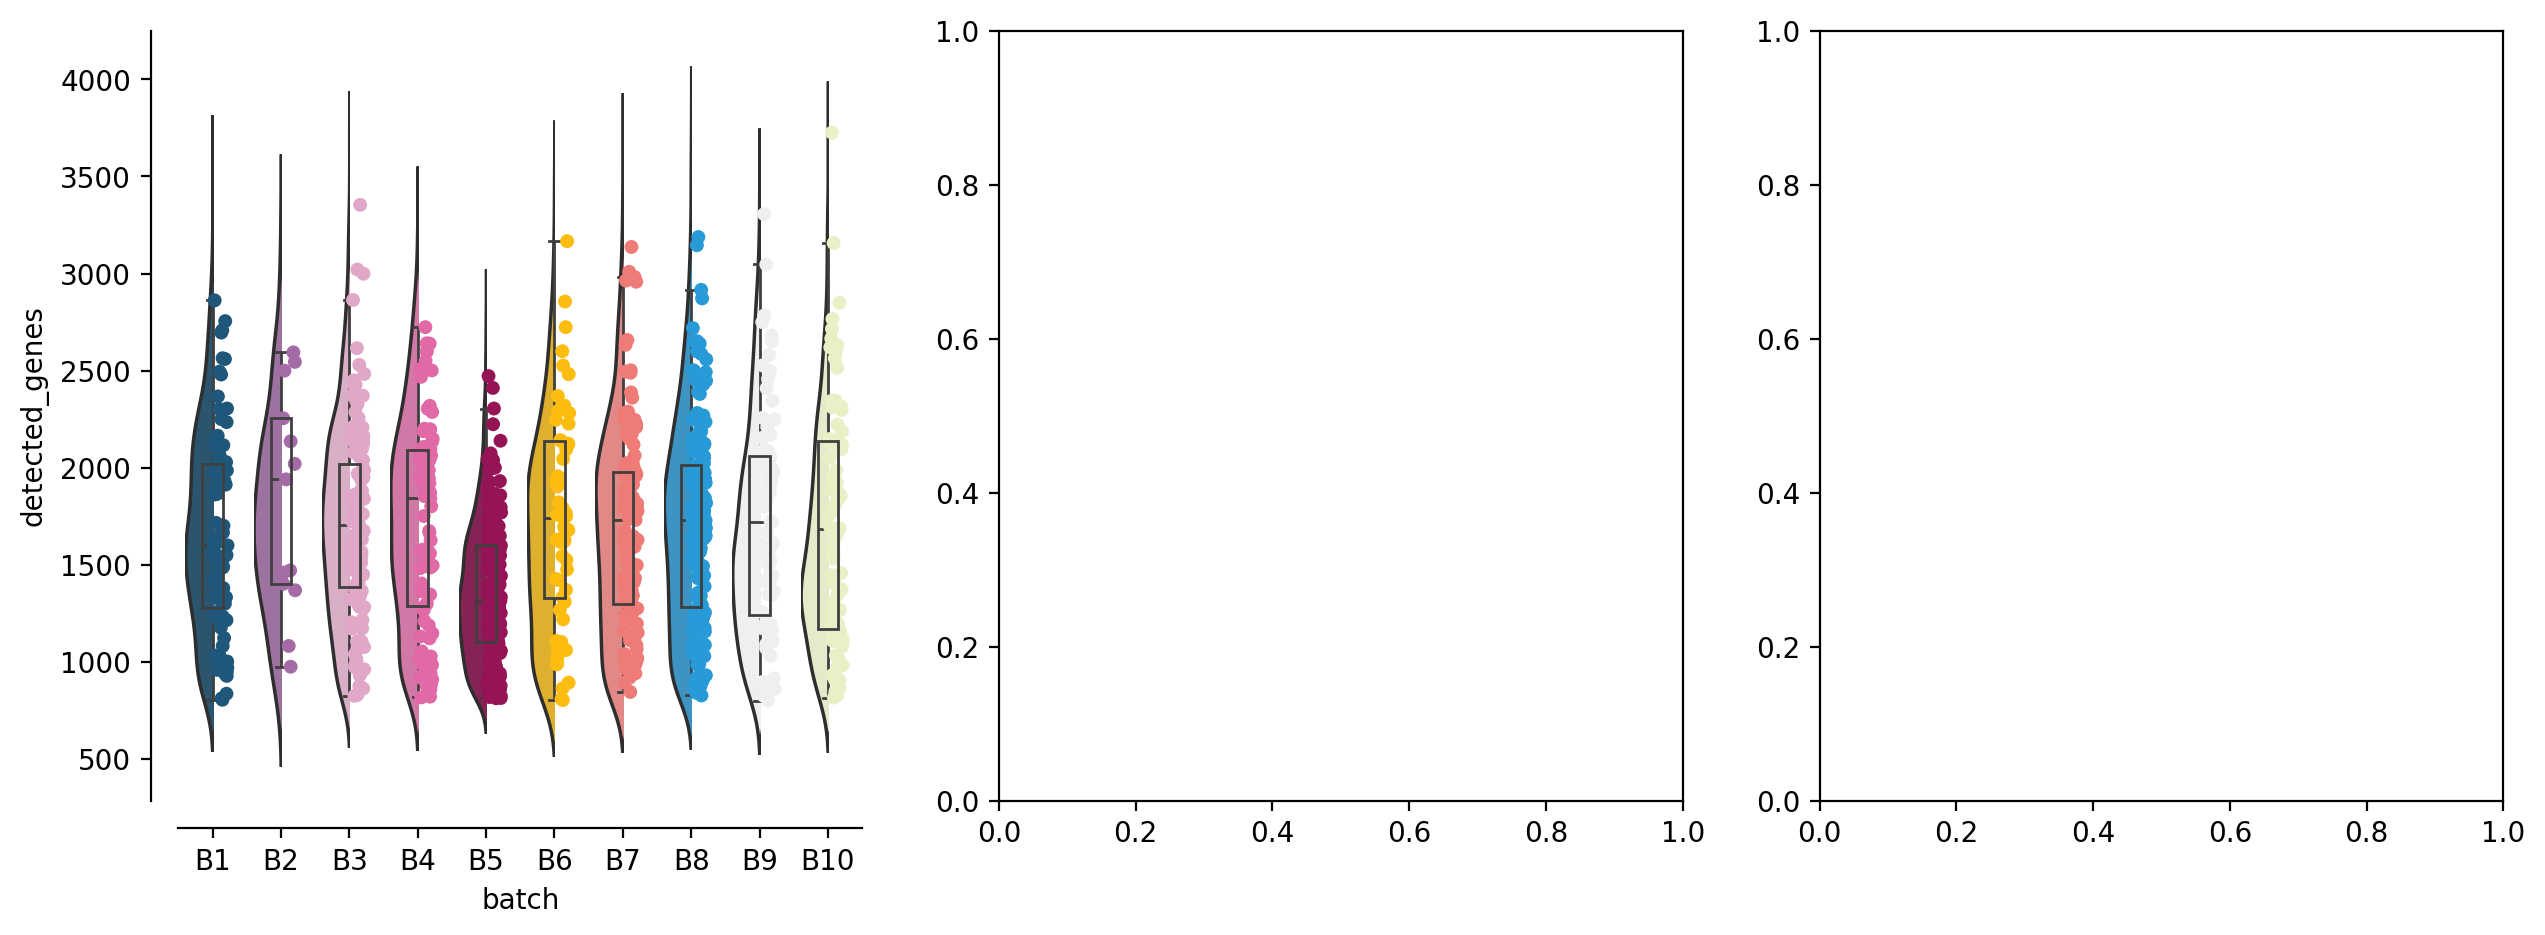

✅ MultiQC-style report generated successfully!
📄 Report saved to: scRNA_analysis_report.html
📊 Visualizations included: 7 plots
🎨 Features: White theme, Dark mode toggle, OmicVerse logo
🎯 Clustering methods detected: 5
🧬 Integration methods: Harmony ✓, scVI ✓
🏆 Best integration method: X_scVI


<Figure size 640x480 with 0 Axes>

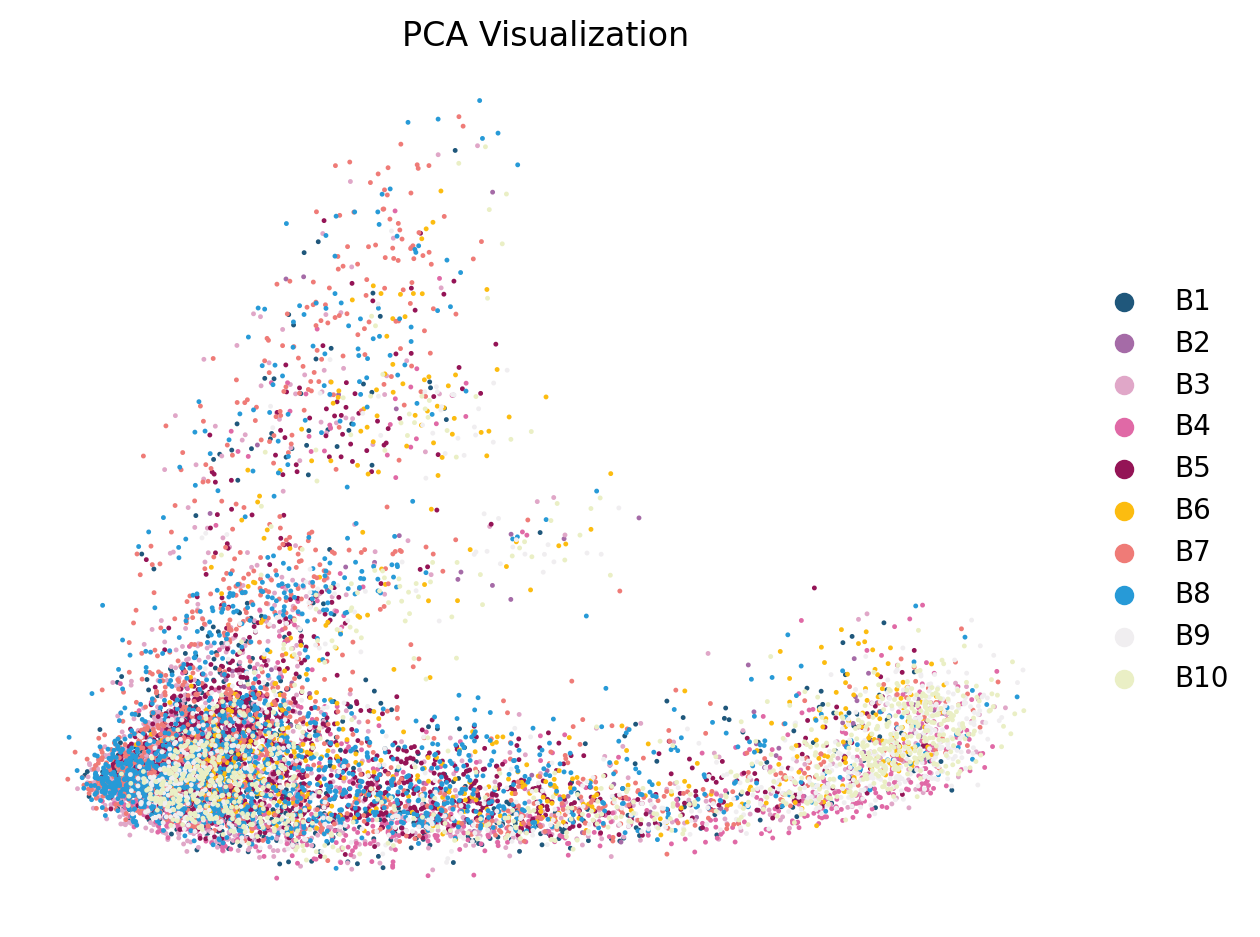

In [5]:
# Usage example:
html_report = ov.single.generate_scRNA_report(
    adata, species='mouse', sample_key='batch',
    output_path="scRNA_analysis_report.html", 
)

## Reference Generation

Starting from version 1.7.0, we record in the `adata` object all the packages you’ve invoked through OmicVerse for easy citation. Please note that this function is still under development, so some packages may be missing.


In [4]:
ov.generate_reference_table(adata)

method                                          reference  \
0      SCCAF                                                      
1  omicverse  Zeng, Z., Ma, Y., Hu, L., Tan, B., Liu, P., Wa...   
2      pymde  Agrawal, A., Ali, A., & Boyd, S. (2021). Minim...   
3     scanpy  Wolf, F. A., Angerer, P., & Theis, F. J. (2018...   
4       tsne  Van der Maaten, L., & Hinton, G. (2008). Visua...   
5       umap  McInnes, L., Healy, J., & Melville, J. (2018)....   

                                             content  
0                 clustering optimization with SCCAF  
1  This analysis is performed with omicverse fram...  
2                                     MDE with pymde  
3                              neighbors with scanpy  
4                               t-SNE with omicverse  
5                                    UMAP with pymde

In [14]:
from IPython.display import IFrame
IFrame(
    src='https://starlitnightly.github.io/single/scRNA_analysis_report.html',
    width=1280,
    height=1000,
)